# (☞ﾟヮﾟ)☞ Emoji Predictor ᕕ( ᐛ )ᕗ



Dataset psychExp

Il dataset iniziale è stato scaricato dal [GitHub repository DeepMoji](https://github.com/bfelbo/DeepMoji/tree/master/data), è di circa 7000 entry.

Il dataset psychExp è formato da un vettore con codifica One Hot che rappresenta le differenti emoji che andremo a predire: 
 
 - Joy 😂
 - Fear 😱
 - Anger 😠
 - Sadness 😢
 - Disgust 😒
 - Shame 😓
 - Guilt 😳

Il dataset è stato poi ampliato con altre 4000 entry grazie ai dataset presenti in [questo sito](http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html), è stata fatta una pulizia tramite script bash per adattare il formato.


```bash
#!/bin/bash

function clean {

sed --regexp-extended "s/(^[0-9]{5})/$2/g" $1_raw | sed --regexp-extended "s/($1.*)//g" | sed --regexp-extended 's/(\&amp)|([ðŸ’˜©•âœ¨œŸ½¼ƒ§€™ˆ¤™€”¥»Œ¹ï¸™„¡‘Š¢—™Â£Ž­¿¾ž®ã‹])|(\&gt;)|(\\n)//g' > $1_clean

}

clean joy "[ 1.  0.  0.  0.  0.  0.  0.]"
clean fear "[ 0.  1.  0.  0.  0.  0.  0.]"
clean anger "[ 0.  0.  1.  0.  0.  0.  0.]"
clean sadness "[ 0.  0.  0.  1.  0.  0.  0.]"
```

### Caricare il dataset


In [0]:

from google.colab import files

uploaded = files.upload()
print(uploaded)


Saving dataset_extended.txt to dataset_extended (1).txt
{'dataset_extended.txt': b'[ 1.  0.  0.  0.  0.  0.  0.] During the period of falling in love, each time that we met and especially when we had not met for a long time.\n[ 0.  1.  0.  0.  0.  0.  0.] When I was involved in a traffic accident.\n[ 0.  0.  1.  0.  0.  0.  0.] When I was driving home after  several days of hard work, there was a motorist ahead of me who was driving at 50 km/hour and refused, despite his low speeed to let me overtake.\n[ 0.  0.  0.  1.  0.  0.  0.] When I lost the person who meant the most to me.\n[ 0.  0.  0.  0.  1.  0.  0.] The time I knocked a deer down - the sight of the animal\'s injuries and helplessness.  The realization that the animal was so badly hurt that it had to be put down, and when the animal screamed at the moment of death.\n[ 0.  0.  0.  0.  0.  1.  0.] When I did not speak the truth.\n[ 0.  0.  0.  0.  0.  0.  1.] When I caused problems for somebody because he could not keep the app

In [0]:
def read_file(file_name): 
    data_list  = []
    with open(file_name, 'r') as f: 
        for line in f: 
            line = line.strip() 
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data_list.append([label, text])
    return data_list 

Il nome del file caricato deve essere specificato nella variabile `file_name`

In [0]:
file_name = "dataset_extended.txt"
psychExp_txt= read_file(file_name)

In [0]:
print("Il numero delle istanze nel dataset è: {}".format(len(psychExp_txt)))

Il numero delle istanze nel dataset è: 11093


In [0]:
print("Data example: ")
print(psychExp_txt[0])

Data example: 
['1. 0. 0. 0. 0. 0. 0.', 'During the period of falling in love, each time that we met and especially when we had not met for a long time.']


### Features
Abbiamo scelto un n-gram compreso tra 1 e 4. Le feature includono la punteggiatura. Se il dato è un tweet contiene anche hash tags       

In [0]:
import re 
from collections import Counter

In [0]:
def ngram(token, n): 
    output = []
    for i in range(n-1, len(token)): 
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram) 
    return output

In [0]:
def create_feature(text, nrange=(1, 1)):
    text_features = [] 
    text = text.lower() 

    # 1. consideriamo i caratteri alfanumerici come token
    # Se il tweet contiene #, lo consideriamo come una feature
    # Estraggo gli n-grammi
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1): 
        text_features += ngram(text_alphanum.split(), n)
    
    # 2. consideriamo la punteggiatura come token
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    
    # 3. torniamo un dizionario dove le chiavi sono una lista di elementi 
    # e i loro valori sono il numero di volte che appaiono nel testo 
    return Counter(text_features)

In [0]:
print(create_feature("I love you!"))
print(create_feature(" aly wins the gold!!!!!!  #olympics"))
print(create_feature(" aly wins the gold!!!!!!  #olympics", (1, 2)))

Counter({'i': 1, 'love': 1, 'you': 1, '!': 1})
Counter({'aly': 1, 'wins': 1, 'the': 1, 'gold': 1, '#olympics': 1, '!!!!!!': 1, '#': 1})
Counter({'aly': 1, 'wins': 1, 'the': 1, 'gold': 1, '#olympics': 1, 'aly wins': 1, 'wins the': 1, 'the gold': 1, 'gold #olympics': 1, '!!!!!!': 1, '#': 1})


### **Convert the lables and Add features to text data**: 

In [0]:
def convert_label(item, name): 
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)): 
        if items[idx] == 1: 
            label += name[idx] + " "
    
    return label.strip()

In [0]:
emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
y_all = []
for label, text in psychExp_txt:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

In [0]:
print("features example: ")
print(X_all[0])

features example: 
Counter({'time': 2, 'we': 2, 'met': 2, 'during': 1, 'the': 1, 'period': 1, 'of': 1, 'falling': 1, 'in': 1, 'love': 1, 'each': 1, 'that': 1, 'and': 1, 'especially': 1, 'when': 1, 'had': 1, 'not': 1, 'for': 1, 'a': 1, 'long': 1, 'during the': 1, 'the period': 1, 'period of': 1, 'of falling': 1, 'falling in': 1, 'in love': 1, 'love each': 1, 'each time': 1, 'time that': 1, 'that we': 1, 'we met': 1, 'met and': 1, 'and especially': 1, 'especially when': 1, 'when we': 1, 'we had': 1, 'had not': 1, 'not met': 1, 'met for': 1, 'for a': 1, 'a long': 1, 'long time': 1, 'during the period': 1, 'the period of': 1, 'period of falling': 1, 'of falling in': 1, 'falling in love': 1, 'in love each': 1, 'love each time': 1, 'each time that': 1, 'time that we': 1, 'that we met': 1, 'we met and': 1, 'met and especially': 1, 'and especially when': 1, 'especially when we': 1, 'when we had': 1, 'we had not': 1, 'had not met': 1, 'not met for': 1, 'met for a': 1, 'for a long': 1, 'a long t

In [0]:
print("Label example:")
print(len(y_all))


Label example:
11093


Classifiers 
Sono stati utilizzati i seguenti classificatori:
+ `SVC`
+ `LinearSVC`
+ `RandomForestClassifier`
+ `DecisionTreeClassifier`
+ `PassiveAggressiveClassifier`
+ `SGDClassifier`
+ `RidgeClassifier`
+ `RidgeClassifierCV`


**Data split**: I dati sono divisi 90-10, dove 90% per il training set e il 10% per il testing. Abbiamo scelto il 10% per essere sicuri di avere un numero sufficiente di dati per la parte di testing e limitare l'overfitting. Abbiamo usato `train_test_split` per splittare i dati. 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X_all, y_all, test_size = 0.1, random_state = 123)

In [0]:
from sklearn.metrics import accuracy_score

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    # print("Training acc: {}".format(train_acc))
    # print("Test acc    : {}".format(test_acc))
    
    return train_acc, test_acc    

**DictVectorizer**: Conversione delle caratteristiche etichettate in vettori sparsi.



In [0]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [0]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier

# classificatori
svc = SVC()
lsvc = LinearSVC(random_state=123, max_iter=5000)
rforest = RandomForestClassifier(random_state=123)
dtree = DecisionTreeClassifier()
pa = PassiveAggressiveClassifier(C=1.0, fit_intercept=True, max_iter=1000, tol=0.001, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, shuffle=True, verbose=0, loss='hinge', n_jobs=None, random_state=None, warm_start=False, class_weight=None, average=False)
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
ridge = RidgeClassifier(alpha=1.0, fit_intercept=False, normalize=False, copy_X=True, max_iter=None, tol=0.001, class_weight=None, solver='saga')

clifs = [svc, lsvc, rforest, dtree, pa, sgd, ridge]

# train and test them 
print("| {:35} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*35, "-"*17, "-"*13))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)

    print("| {:35} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

| Classifier                          | Training Accuracy | Test Accuracy |
| ----------------------------------- | ----------------- | ------------- |
| SVC                                 |         0.9249725 |     0.5054054 |
| LinearSVC                           |         0.9949915 |     0.6171171 |
| RandomForestClassifier              |         0.9949915 |     0.5585586 |
| DecisionTreeClassifier              |         0.9949915 |     0.5117117 |
| PassiveAggressiveClassifier         |         0.9949915 |     0.5819820 |
| SGDClassifier                       |         0.9942903 |     0.6324324 |
| RidgeClassifier                     |         0.9939898 |     0.6477477 |
| RidgeClassifierCV                   |         0.9941901 |     0.6477477 |


**Risultati**: L'accuratezza per il training e per il test di ogni classificatore sono riassunte nella tabella.


| Classifier                          | Training Accuracy | Test Accuracy |
| ----------------------------------- | ----------------- | ------------- |
| SVC                                 |         0.9249725 |     0.5054054 |
| LinearSVC                           |         0.9949915 |     0.6171171 |
| RandomForestClassifier              |         0.9949915 |     0.5585586 |
| DecisionTreeClassifier              |         0.9949915 |     0.5117117 |
| PassiveAggressiveClassifier         |         0.9949915 |     0.5819820 |
| SGDClassifier                       |         0.9942903 |     0.6324324 |
| RidgeClassifier                     |         0.9939898 |     0.6477477 |

Guardando i risultati, LinearSVC lavora bene, cosi come SGDClassifier, RidgeClassifier, in Ridge l'accuratezza è leggermente superiore rispetto agli altri classificatori. 

In generale possiamo notare che abbiamo sempre una training accuracy maggiore della test accuracy, abbiamo dell'overfitting.


Dal momento che RidgeClassifier sembra lavorare bene, abbiamo fatto un tuning dei parametri per minimizzare l'overfitting.


In [0]:
from sklearn.model_selection import GridSearchCV

parameters={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}

ridge = RidgeClassifier(alpha=1.0, fit_intercept=False, normalize=False, copy_X=True, max_iter=None, tol=0.001, class_weight=None, solver='saga')
grid_obj = GridSearchCV(ridge, param_grid = parameters, cv=5)

grid_obj.fit(X_train, y_train)

print("Validation acc: {}".format(grid_obj.best_score_))
print("Training acc: {}".format(accuracy_score(y_train, grid_obj.predict(X_train))))
print("Test acc    : {}".format(accuracy_score(y_test, grid_obj.predict(X_test))))
print("Best parameter: {}".format(grid_obj.best_params_))

Validation acc: 0.6342794251497487
Training acc: 0.9936892717619954
Test acc    : 0.6522522522522523
Best parameter: {'alpha': 2}


**Final model**

Sia 'sag' che 'saga' utilizzano la Stochastic Average Gradient Descent, ma 'saga' usa la versione imparziale e più flessibile. Entrambi i metodi usano una procedura iterativa e sono spesso più veloci di altri solvers quando il numero delle feature è elevato. 

Il modello finale ha avuto i seguenti risultati:


| Validation Accuracy | Training Accuracy  | Test Accuracy     | Best parameter     |
| --------------------| -----------------  |-------------------|-------------------|
| 0.6342794251497487  | 0.9936892717619954 | 0.6522522522522523| alpha = 2 |

Come ci aspettavamo, a causa delle dimensioni del dataset, l'accuracy non è alta, ma accettabile.

**Analisi degli errori**

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, grid_obj.predict(X_test))
print(matrix)

[[124  10  10  10  14  16   7]
 [ 17  65  12   2   8   7   4]
 [ 16   9 150   2   9  15   2]
 [ 17   4   8  55  10   9  14]
 [  4   4   9   1 144   4   3]
 [ 12   4  20   2  17 135   6]
 [ 17  12  11  15   8   5  51]]


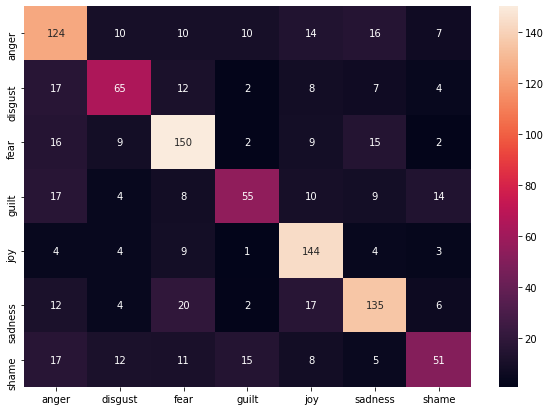

In [0]:
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
df_cm = pd.DataFrame(matrix, index = l, columns = l)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")
plt.show()

# Reference https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

In [0]:
# Get counts for each label
label_freq = {}
for label, _ in psychExp_txt: 
    label_freq[label] = label_freq.get(label, 0) + 1

# print the labels and their counts in sorted order 
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))

fear      (0. 1. 0. 0. 0. 0. 0.)  2225
anger     (0. 0. 1. 0. 0. 0. 0.)  1937
joy       (1. 0. 0. 0. 0. 0. 0.)  1907
sadness   (0. 0. 0. 1. 0. 0. 0.)  1865
disgust   (0. 0. 0. 0. 1. 0. 0.)  1057
guilt     (0. 0. 0. 0. 0. 0. 1.)  1057
shame     (0. 0. 0. 0. 0. 1. 0.)  1045


### Future Work 

I risultati sui diversi classificatori sono sicuramente incoraggianti: possiamo affermare che con un dataset più ampio potremmo sicuramente avere overfitting migliore e quindi prestazioni migliori in termini di accuracy. 

La confusion matrix ci permette graficamente di vedere il numero di errori di classificazione e quali sono le emozioni che vengono confuse più spesso.


Non possiamo escludere che al crescere del dataset il classificatore che ottiene prestazioni migliori rimanga il RidgeClassifier.


# **Test finale**


In [0]:
emoji_dict = {"joy":"😂", "fear":"😱", "anger":"😠", "sadness":"😢", "disgust":"😒", "shame":"😓", "guilt":"😳"}

In [0]:
t1 = "At my Summer job a new caretaker had been employed who was my age."
t2 = "My car skidded on the wet street"
t3 = "My cat died"
t4 = "I was going to clean it when I found that the drum was full of mud and slime."
t5 = "I am ashamed of what I have done"
t6 = "I pass the exam!"

texts = [t1, t2, t3, t4, t5, t6]
for text in texts: 
    features = create_feature(text, nrange=(1, 4))
    features = vectorizer.transform(features)
    prediction = grid_obj.predict(features)[0]
    print("{} {}".format(emoji_dict[prediction], text))

😳 At my Summer job a new caretaker had been employed who was my age.
😱 My car skidded on the wet street
😢 My cat died
😒 I was going to clean it when I found that the drum was full of mud and slime.
😓 I am ashamed of what I have done
😂 I pass the exam!
